In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
df = pd.read_csv(url)

In [7]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [10]:
df['Date'] = pd.to_datetime(df.Date)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


<AxesSubplot:ylabel='Frequency'>

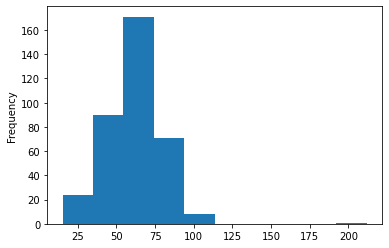

In [16]:
df.Temperature.plot.hist()

thoughts - looks like the 200 is an outlier. Thinking about real life, this is absolutely an outlier. Could the temp be in a different unit of measurement here or a typo?

<AxesSubplot:ylabel='Frequency'>

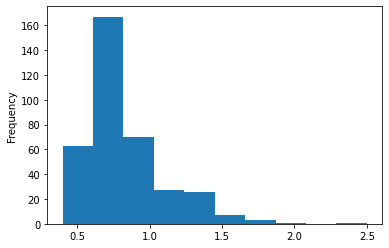

In [17]:
df.Rainfall.plot.hist()

<AxesSubplot:ylabel='Frequency'>

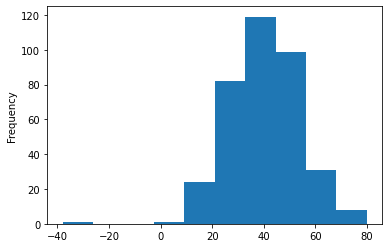

In [18]:
df.Flyers.plot.hist()

thoughts - how do you have negative flyers? I feel like this may be an input mistake

<AxesSubplot:ylabel='Frequency'>

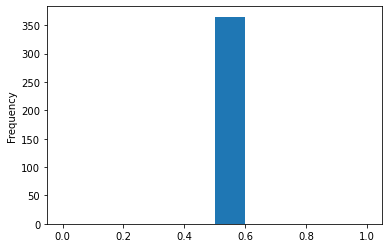

In [19]:
df.Price.plot.hist()

In [20]:
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

thought - my only thought here is that this column wouldn't really be needed as nothing changes here. 

<AxesSubplot:ylabel='Frequency'>

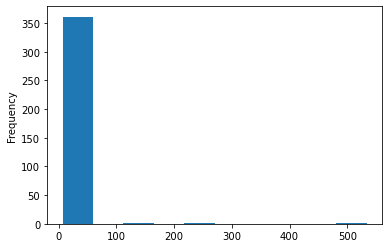

In [21]:
df.Sales.plot.hist()

thoughts- don't know what's going on with the high amount of sales on certain occasions yet, but to be looked at further. Could this be due to a special event or something? To be explored

<AxesSubplot:xlabel='Day', ylabel='Count'>

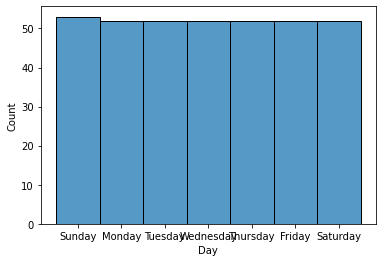

In [30]:
sns.histplot(df.Day)

In [31]:
df.Day.value_counts()

Sunday       53
Monday       52
Tuesday      52
Wednesday    52
Thursday     52
Friday       52
Saturday     52
Name: Day, dtype: int64

-thoughts- looks very evenly distributed here. could still be useful to see if anything comes up for days with mutlivariate explore

-we're going to consider the target to be Sales

### Exercise Question 1

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [35]:
dff = df.copy() #making copy to be able to reference original df easily

In [36]:
dff.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


- lower inner fence: Q1 - 1.5*IQR
- upper inner fence: Q3 + 1.5*IQR
- lower outer fence: Q1 - 3*IQR
- upper outer fence: Q3 + 3*IQR

In [84]:
q1, q3 = dff.Temperature.quantile([.25, .75])
iqr = q3 - q1
lower_bound_1_5 = q1 - (1.5 * iqr)
upper_bound_1_5 = q3 + (1.5 * iqr)
lower_bound_3 = q1 - (3 * iqr)
upper_bound_3 = q3 + (3 * iqr)

print('lower bound with multiplier of 1.5: {:}'.format(lower_bound_1_5))
print('upper bound with multiplier of 1.5: {:}'.format(upper_bound_1_5))
print('lower bound with multiplier of 3: {:}'.format(lower_bound_3))
print('upper bound with multiplier of 3: {:}'.format(upper_bound_3))

lower bound with multiplier of 1.5: 16.700000000000003
upper bound with multiplier of 1.5: 104.7
lower bound with multiplier of 3: -16.299999999999997
upper bound with multiplier of 3: 137.7


In [89]:
df.Temperature.value_counts().sort_index().head(20)

15.1    1
22.0    1
25.3    1
27.0    1
28.6    1
28.9    2
30.6    1
30.9    3
31.2    1
31.3    1
31.6    1
31.9    1
32.2    4
32.6    1
32.9    1
33.5    2
34.5    1
34.9    2
35.2    1
35.5    2
Name: Temperature, dtype: int64

### Temperature Outliers Thoughts-

- lower bound with multiplier of 1.5: I don't think removing the one outlier below 16.7 would make much sense because there are several cold weather days that are somewhat close to this temperature so it wouldn't make sense to cut it off right here to me

- upper bound with multiplier of 1.5: Cutting of the temp here does make sense as there is only one record cut off and it shows 212 (obviously a mistake, but no way of knowing what it's supposed to be right now)

- lower bound with multiplier of 3: setting the limit here doesn't remove any data. I would actually make the choice not to remove any lower bound records here as in my opinion, there is not a clear cutoff point and I don't see anything that strikes me as extreme on the lower end for now.

- upper bound with multiplier of 3: this limit accompishing the same thing as the using the 1.5 multiplier. I do think the one extreme upper temperature should be cut.

In [90]:
q1, q3 = dff.Rainfall.quantile([.25, .75])
iqr = q3 - q1
lower_bound_1_5 = q1 - (1.5 * iqr)
upper_bound_1_5 = q3 + (1.5 * iqr)
lower_bound_3 = q1 - (3 * iqr)
upper_bound_3 = q3 + (3 * iqr)

print('lower bound with multiplier of 1.5: {:}'.format(lower_bound_1_5))
print('upper bound with multiplier of 1.5: {:}'.format(upper_bound_1_5))
print('lower bound with multiplier of 3: {:}'.format(lower_bound_3))
print('upper bound with multiplier of 3: {:}'.format(upper_bound_3))

lower bound with multiplier of 1.5: 0.26
upper bound with multiplier of 1.5: 1.3
lower bound with multiplier of 3: -0.13
upper bound with multiplier of 3: 1.69


In [92]:
df.Rainfall.value_counts().sort_index()

0.40     1
0.47     7
0.49     1
0.50     3
0.51     6
0.53     2
0.54     6
0.56     7
0.57    10
0.59    12
0.61     8
0.63    18
0.65    17
0.67    19
0.69    22
0.71    19
0.74    26
0.77    26
0.80    20
0.83    17
0.87    18
0.91    10
0.95    11
1.00    14
1.05    15
1.11     7
1.18     5
1.25    10
1.33     9
1.43     7
1.54     7
1.67     1
1.82     2
2.00     1
2.50     1
Name: Rainfall, dtype: int64

In [99]:
(df.Rainfall > upper_bound_1_5).sum(), (df.Rainfall > upper_bound_1_5).sum()/len(df)

(28, 0.07671232876712329)

In [98]:
(df.Rainfall > upper_bound_3 ).sum(), (df.Rainfall > upper_bound_3).sum()/len(df)

(4, 0.010958904109589041)

### Rainfall Outliers Thoughts-

- lower bound with multiplier of 1.5: No records will be lost here. This makes sense to me as there wouldn't be a logical reason to drop records with very low rain for lemonade sales. I would think little to no rain is the more likely scenario (could be location dependent of course)

- upper bound with multiplier of 1.5: using this cutoff would result in 28 records being cut and 8% of the data. I not choose to use this cutoff point as there are records with very similar rainfall that wouldn't be cut and choosing this point wouldn't make sense. I also think it'd be important to look at how high rainfall could impact sales. Of course, we could go back and change this if finding it's useless to keep these, but right now, I'd be curious to see what happens keeping these. 

- lower bound with multiplier of 3: Again, records not impacted here

- upper bound with multiplier of 3: This limit seems appropriate to me. We'd lose 4 records and 1% of the data. I'd think that extreme rain would cause too much of a disruption for lemonade sales, but actually, I'd need to know more about the lemonade sales before making this call. It's possible the sales might be indoors and that could change things. I could make a case for either setting the limit here or not removing any. I would likely start with not removing any and re-evaluate after exploration if needed.

In [100]:
q1, q3 = dff.Flyers.quantile([.25, .75])
iqr = q3 - q1
lower_bound_1_5 = q1 - (1.5 * iqr)
upper_bound_1_5 = q3 + (1.5 * iqr)
lower_bound_3 = q1 - (3 * iqr)
upper_bound_3 = q3 + (3 * iqr)

print('lower bound with multiplier of 1.5: {:}'.format(lower_bound_1_5))
print('upper bound with multiplier of 1.5: {:}'.format(upper_bound_1_5))
print('lower bound with multiplier of 3: {:}'.format(lower_bound_3))
print('upper bound with multiplier of 3: {:}'.format(upper_bound_3))

lower bound with multiplier of 1.5: 4.0
upper bound with multiplier of 1.5: 76.0
lower bound with multiplier of 3: -23.0
upper bound with multiplier of 3: 103.0


In [102]:
df.Flyers.value_counts().sort_index()

-38    1
 9     1
 11    1
 15    4
 16    4
      ..
 72    1
 74    1
 76    2
 77    1
 80    1
Name: Flyers, Length: 63, dtype: int64

### Flyers Outliers Thoughts-

- lower bound with multiplier of 1.5: We would lose one record here and I am in favor of that. I don't see how there can be negative flyers. It's possible that the - sign was inserted by mistake, but I don't feel confident enough to change it so dropping it would be best and only lose one record.

- upper bound with multiplier of 1.5: We'd only lose a couple records with this limit, but I don't think it's appropriate to cut off here because the values of flyers are very close together in the upper range and based on my limited domain knowledge right now, I'd say the difference between 60, 70, 80 fliers MAY be meaningless. Could always adjust, but I'd keep all for now.

- lower bound with multiplier of 3: Would still lose just one record and I think that's the right call.

- upper bound with multiplier of 3: Would lose no records with this limit and that's the choice I'd make for now

In [103]:
q1, q3 = dff.Sales.quantile([.25, .75])
iqr = q3 - q1
lower_bound_1_5 = q1 - (1.5 * iqr)
upper_bound_1_5 = q3 + (1.5 * iqr)
lower_bound_3 = q1 - (3 * iqr)
upper_bound_3 = q3 + (3 * iqr)

print('lower bound with multiplier of 1.5: {:}'.format(lower_bound_1_5))
print('upper bound with multiplier of 1.5: {:}'.format(upper_bound_1_5))
print('lower bound with multiplier of 3: {:}'.format(lower_bound_3))
print('upper bound with multiplier of 3: {:}'.format(upper_bound_3))

lower bound with multiplier of 1.5: 5.0
upper bound with multiplier of 1.5: 45.0
lower bound with multiplier of 3: -10.0
upper bound with multiplier of 3: 60.0


In [104]:
df.Sales.value_counts().sort_index()

7       1
10      2
11      2
12      4
13      9
14      8
15     10
16      6
17     11
18     12
19     16
20     11
21     10
22     10
23     18
24     24
25     35
26     22
27     19
28     14
29     23
30     18
31     16
32     13
33      8
34      5
35     12
36      4
37      3
38      3
39      2
40      4
41      3
42      2
43      1
143     1
158     1
235     1
534     1
Name: Sales, dtype: int64

### Flyers Outliers Thoughts-

- lower bound with multiplier of 1.5: No records lost with this limit. This seems appropriate to me right now

- upper bound with multiplier of 1.5: We'd lose 4 records and those records have an extremely high number of sales compared to most of the day. This leads me to believe these 4 records are too different to be used in the same analysis as all other records. Perhaps these sales were at a special event or in a very populated area. We don't have the information to determine that right now, so I am in favor of dropping them.

- lower bound with multiplier of 3: Again, no records lost here.

- upper bound with multiplier of 3: The same records would be lost here on the upper side.